In [ ]:
import pandas as pd
import numpy as np

Load Data

In [ ]:
datadl=pd.read_csv('train_df6.csv')
datadl.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Type

In [ ]:
datadl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6942 non-null   object 
 1   gender            6942 non-null   object 
 2   SeniorCitizen     6942 non-null   int64  
 3   Partner           6942 non-null   object 
 4   Dependents        6942 non-null   object 
 5   tenure            6942 non-null   int64  
 6   PhoneService      6942 non-null   object 
 7   MultipleLines     6942 non-null   object 
 8   InternetService   6942 non-null   object 
 9   OnlineSecurity    6942 non-null   object 
 10  OnlineBackup      6942 non-null   object 
 11  DeviceProtection  6942 non-null   object 
 12  TechSupport       6942 non-null   object 
 13  StreamingTV       6942 non-null   object 
 14  StreamingMovies   6942 non-null   object 
 15  Contract          6942 non-null   object 
 16  PaperlessBilling  6942 non-null   object 


In [ ]:
datadl['TotalCharges'] = pd.to_numeric(datadl['TotalCharges'],errors='coerce') #perbaiki TotalChares

Cek Missing Value

In [ ]:
datadl.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Mengatasi Missing dengan drop
datadl.dropna(subset=['TotalCharges'],inplace=True)

Cek Duplikasi Data

In [ ]:
datadl.duplicated().sum()

0

Nilai data setiap variabel object

In [ ]:
for i in datadl.select_dtypes('object').columns:
  print(f'{i}: {datadl[i].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '2758-RNWXS' '2314-TNDJQ'
 '2405-LBMUW']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Meringkas data dengan menggabungkan No dan No Phone sercive / No Internet Service

In [ ]:
datadl.replace('No internet service','No',inplace=True)
datadl.replace('No phone service','No',inplace=True)

In [ ]:
for i in datadl.select_dtypes('object').columns:
  print(f'{i}: {datadl[i].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '2758-RNWXS' '2314-TNDJQ'
 '2405-LBMUW']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Kelas Variabel Target

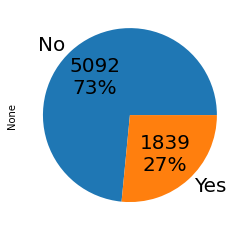

In [ ]:
# pie chart gender
def label_function(val):
    return f'{val / 100 * len(datadl):.0f}\n{val:.0f}%'
datadl.groupby('Churn').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20})

Mengubah Kategori ke angka

In [ ]:
categorical_le = ['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies',
                   'PaperlessBilling','Churn']
categorical_ohe = ['InternetService',  'Contract','PaymentMethod']
numerical_features = ['tenure','MonthlyCharges', 'TotalCharges']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le2 = LabelEncoder()
for col in categorical_le:
  datadl[col] = le2.fit_transform(datadl[col])

In [ ]:
datadl = pd.get_dummies(data=datadl, columns=categorical_ohe)

Korelasi Data

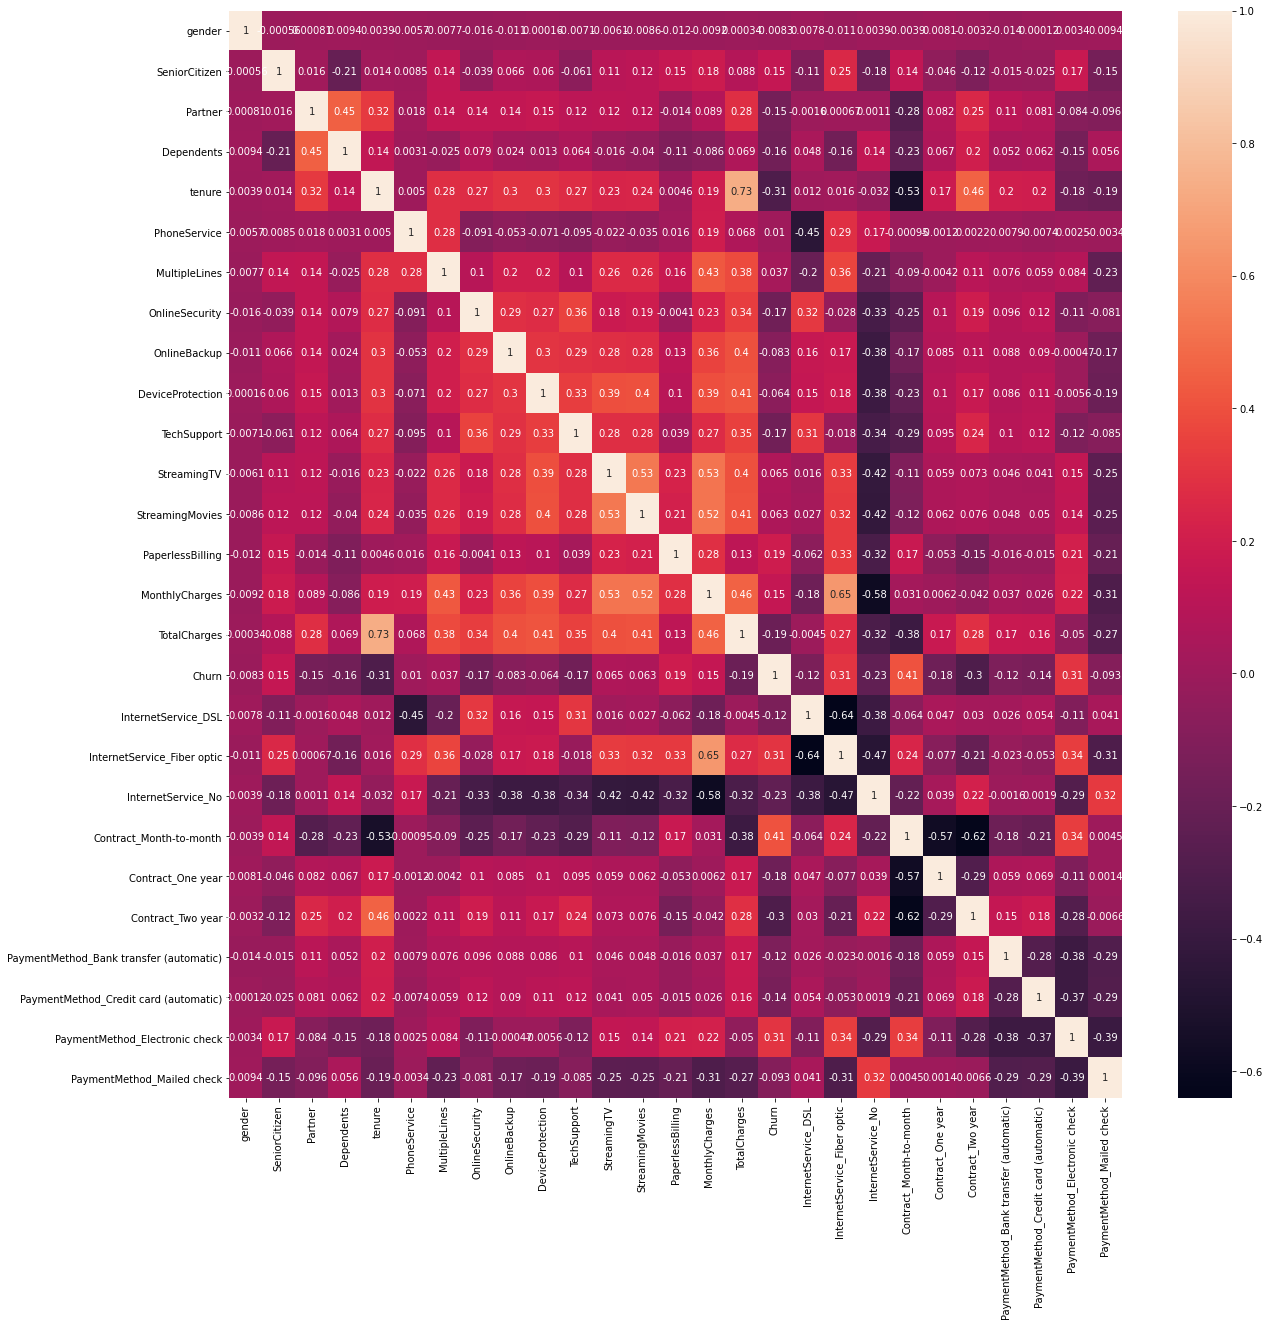

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
cor = datadl.corr(method='kendall')
sns.heatmap(cor,annot=True)
plt.show()

Modeling

In [ ]:
X=datadl.drop(['customerID','Churn'], axis=1)
y=datadl['Churn']

In [ ]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2,random_state=0)

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
XSmote, ySmote = oversample.fit_resample(xTrain, yTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
XSmote=pd.DataFrame(XSmote)
XSmote.columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

In [ ]:
ySmote=pd.DataFrame(ySmote)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
datadl[numerical_features] = scaler2.fit_transform(datadl[numerical_features])

In [ ]:
XNorm=datadl.drop(['customerID','Churn'], axis=1)
yNorm=datadl['Churn']

xTrainNorm, xTestNorm, yTrain, yTest = train_test_split(XNorm, yNorm, test_size = 0.2,random_state=0)

#KERAS

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import  Adam

def create_model(learn_rate=0.01):
	# membuat model dengan beberapa layer
  model = Sequential()
  model.add(Dense(50, input_dim=26, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
	# Compile model dengan optimasi adam
  optimizer=Adam()
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

Data asli

In [ ]:
# fix random seed for reproducibility
seed = 12
numpy.random.seed(seed)
#model
model = KerasClassifier(build_fn=create_model,epochs=100, batch_size=10, verbose=0)
# menentukan parameter model yang akan ditunning
learn_rate = [0.1,0.01, 0.001]
param = dict(learn_rate=learn_rate)
gridmodel = GridSearchCV(estimator=model, param_grid=param, n_jobs=-1, cv=3)
gridmodel_result = gridmodel.fit(xTrain, yTrain)
# melihat hasil pencarian parameter terbaik 
print("Terbaik: %f Parameter %s" % (gridmodel_result.best_score_, gridmodel_result.best_params_))
means = gridmodel_result.cv_results_['mean_test_score']
stds = gridmodel_result.cv_results_['std_test_score']
params = gridmodel_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) dengan: %r" % (mean, stdev, param))

Terbaik: 0.798701 Parameter {'learn_rate': 0.001}
0.789683 (0.003374) dengan: {'learn_rate': 0.1}
0.791486 (0.000675) dengan: {'learn_rate': 0.01}
0.798701 (0.003775) dengan: {'learn_rate': 0.001}


In [ ]:
y_pred1=gridmodel_result.predict(xTest)

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(yTest,y_pred1))
print(classification_report(yTest,y_pred1))
print(accuracy_score(yTest,y_pred1))

[[1000    0]
 [ 387    0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1000
           1       0.00      0.00      0.00       387

    accuracy                           0.72      1387
   macro avg       0.36      0.50      0.42      1387
weighted avg       0.52      0.72      0.60      1387

0.7209805335255948


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Standarisasi

In [ ]:
# fix random seed for reproducibility
seed = 12
numpy.random.seed(seed)
#model
model = KerasClassifier(build_fn=create_model,epochs=100, batch_size=10, verbose=0)
# menentukan parameter model yang akan ditunning
learn_rate = [0.1,0.01, 0.001]
param = dict(learn_rate=learn_rate)
gridmodel2 = GridSearchCV(estimator=model, param_grid=param, n_jobs=-1, cv=3)
gridmodel_result2 = gridmodel2.fit(xTrainNorm, yTrain)
# melihat hasil pencarian parameter terbaik 
print("Terbaik: %f Parameter %s" % (gridmodel_result2.best_score_, gridmodel_result2.best_params_))
means = gridmodel_result2.cv_results_['mean_test_score']
stds = gridmodel_result2.cv_results_['std_test_score']
params = gridmodel_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) dengan: %r" % (mean, stdev, param))

Terbaik: 0.744589 Parameter {'learn_rate': 0.01}
0.743687 (0.004765) dengan: {'learn_rate': 0.1}
0.744589 (0.009066) dengan: {'learn_rate': 0.01}
0.742965 (0.011888) dengan: {'learn_rate': 0.001}


In [ ]:
  y_pred2=gridmodel_result2.predict(xTestNorm)

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(yTest,y_pred2))
print(classification_report(yTest,y_pred2))
print(accuracy_score(yTest,y_pred2))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[849 151]
 [187 200]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.57      0.52      0.54       387

    accuracy                           0.76      1387
   macro avg       0.69      0.68      0.69      1387
weighted avg       0.75      0.76      0.75      1387

0.756308579668349


Smote

In [ ]:
# fix random seed for reproducibility
seed = 12
numpy.random.seed(seed)
#model
model = KerasClassifier(build_fn=create_model,epochs=100, batch_size=10, verbose=0)
# menentukan parameter model yang akan ditunning
learn_rate = [0.1,0.01, 0.001]
param = dict(learn_rate=learn_rate)
gridmodel = GridSearchCV(estimator=model, param_grid=param, n_jobs=-1, cv=3)
gridmodel_result = gridmodel.fit(XSmote, ySmote)
# melihat hasil pencarian parameter terbaik 
print("Terbaik: %f Parameter %s" % (gridmodel_result.best_score_, gridmodel_result.best_params_))
means = gridmodel_result.cv_results_['mean_test_score']
stds = gridmodel_result.cv_results_['std_test_score']
params = gridmodel_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) dengan: %r" % (mean, stdev, param))

Terbaik: 0.625367 Parameter {'learn_rate': 0.001}
0.605083 (0.078584) dengan: {'learn_rate': 0.1}
0.624267 (0.134110) dengan: {'learn_rate': 0.01}
0.625367 (0.113695) dengan: {'learn_rate': 0.001}


In [ ]:
from sklearn.metrics import accuracy_score

yPred=gridmodel_result.predict(xTest)
accuracy_score(yTest, yPred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.7692862292718097

#SKLEARN

Data asli

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50),(30,40),(20,)],
    'activation': ['logistic','tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.01, 0.1, 0.5]
}
clf1 = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf1.fit(xTrain, yTrain) 
# melihat hasil pencarian parameter terbaik 
print("Terbaik: %f Parameter %s" % (clf1.best_score_, clf1.best_params_))
means = clf1.cv_results_['mean_test_score']
stds = clf1.cv_results_['std_test_score']
params = clf1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) dengan: %r" % (mean, stdev, param))

Terbaik: 0.799420 Parameter {'activation': 'relu', 'alpha': 0.5, 'hidden_layer_sizes': (20,), 'solver': 'adam'}
0.738095 (0.000412) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.790223 (0.007266) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.738095 (0.000412) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 40), 'solver': 'sgd'}
0.790223 (0.007199) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 40), 'solver': 'adam'}
0.743866 (0.011300) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'solver': 'sgd'}
0.793290 (0.008129) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'solver': 'adam'}
0.738095 (0.000412) dengan: {'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.795453 (0.006605) dengan: {'acti

In [ ]:
y_pred3=clf1.predict(xTest)

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(yTest,y_pred3))
print(classification_report(yTest,y_pred3))
print(accuracy_score(yTest,y_pred3))

[[942  58]
 [224 163]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1000
           1       0.74      0.42      0.54       387

    accuracy                           0.80      1387
   macro avg       0.77      0.68      0.70      1387
weighted avg       0.79      0.80      0.78      1387

0.7966834895457823


Standarisasi

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50),(30,40),(20,)],
    'activation': ['logistic','tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.01, 0.1, 0.5]
}
clf2 = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf2.fit(xTrainNorm, yTrain) 
# melihat hasil pencarian parameter terbaik 
print("Terbaik: %f Parameter %s" % (clf2.best_score_, clf2.best_params_))
means = clf2.cv_results_['mean_test_score']
stds = clf2.cv_results_['std_test_score']
params = clf2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) dengan: %r" % (mean, stdev, param))

Terbaik: 0.804655 Parameter {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (20,), 'solver': 'adam'}
0.738095 (0.000412) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.803572 (0.006317) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.738095 (0.000412) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 40), 'solver': 'sgd'}
0.799785 (0.008394) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 40), 'solver': 'adam'}
0.738095 (0.000412) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'solver': 'sgd'}
0.801227 (0.009525) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'solver': 'adam'}
0.738095 (0.000412) dengan: {'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.799964 (0.009438) dengan: {'acti

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
y_pred4=clf2.predict(xTestNorm)

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(yTest,y_pred4))
print(classification_report(yTest,y_pred4))
print(accuracy_score(yTest,y_pred4))

[[908  92]
 [178 209]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1000
           1       0.69      0.54      0.61       387

    accuracy                           0.81      1387
   macro avg       0.77      0.72      0.74      1387
weighted avg       0.80      0.81      0.80      1387

0.8053352559480894


Smote

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50),(30,40),(20,)],
    'activation': ['logistic','tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.01, 0.1, 0.5]
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(XSmote, ySmote) 
# melihat hasil pencarian parameter terbaik 
print("Terbaik: %f Parameter %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) dengan: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Terbaik: 0.773582 Parameter {'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.582729 (0.106551) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.764173 (0.011354) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.687438 (0.012304) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 40), 'solver': 'sgd'}
0.765396 (0.018152) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 40), 'solver': 'adam'}
0.656770 (0.023891) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'solver': 'sgd'}
0.768695 (0.008639) dengan: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'solver': 'adam'}
0.593977 (0.081069) dengan: {'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.773582 (0.004715) de

Data Uji

In [ ]:
datatest=pd.read_csv('test_df6.csv')

In [ ]:
datatest.replace('No internet service','No',inplace=True)
datatest.replace('No phone service','No',inplace=True)

In [ ]:
categorical_le_test = ['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies',
                   'PaperlessBilling']
categorical_ohe = ['InternetService',  'Contract','PaymentMethod']
numerical_features = ['tenure','MonthlyCharges', 'TotalCharges']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
datatest[numerical_features] = scaler2.fit_transform(datatest[numerical_features])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le2 = LabelEncoder()
for col in categorical_le_test:
  datatest[col] = le2.fit_transform(datatest[col])

datatest = pd.get_dummies(data=datatest, columns=categorical_ohe)

In [ ]:
x_testReal=datatest.drop(['Unnamed: 0','customerID'], axis=1)

In [ ]:
y_predReal=clf2.predict(x_testReal)

In [ ]:
y_predReal=pd.DataFrame(y_predReal)

In [ ]:
y_predReal.columns=['Churn']

In [ ]:
y_predReal.to_excel('Churn Prediction DATABLADE.xlsx')